In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
import io
import tarfile
import urllib.request
col_names = ['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome', 'medianHouseValue']
with open('cal_house.tgz', 'rb') as file_obj:
    tar = tarfile.open(fileobj=file_obj, mode="r|gz")
    for member in tar:
        if 'data' in member.name: 
            content = tar.extractfile(member).read()
            df = pd.read_csv(io.BytesIO(content), encoding='utf8', header=None, names=col_names)
print(df)

       longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0        -122.23     37.88              41.0       880.0          129.0   
1        -122.22     37.86              21.0      7099.0         1106.0   
2        -122.24     37.85              52.0      1467.0          190.0   
3        -122.25     37.85              52.0      1274.0          235.0   
4        -122.25     37.85              52.0      1627.0          280.0   
...          ...       ...               ...         ...            ...   
20635    -121.09     39.48              25.0      1665.0          374.0   
20636    -121.21     39.49              18.0       697.0          150.0   
20637    -121.22     39.43              17.0      2254.0          485.0   
20638    -121.32     39.43              18.0      1860.0          409.0   
20639    -121.24     39.37              16.0      2785.0          616.0   

       population  households  medianIncome  medianHouseValue  
0           322.0       126.0      

In [17]:
df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20640 non-null  float64
 1   latitude          20640 non-null  float64
 2   housingMedianAge  20640 non-null  float64
 3   totalRooms        20640 non-null  float64
 4   totalBedrooms     20640 non-null  float64
 5   population        20640 non-null  float64
 6   households        20640 non-null  float64
 7   medianIncome      20640 non-null  float64
 8   medianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [20]:
df.isnull().sum()

longitude           0
latitude            0
housingMedianAge    0
totalRooms          0
totalBedrooms       0
population          0
households          0
medianIncome        0
medianHouseValue    0
dtype: int64

In [21]:
df.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [22]:
df.corr()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,-0.079809,-0.144160
housingMedianAge,-0.108197,0.011173,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,-0.119034,0.105623
totalRooms,0.044568,-0.036100,-0.361262,1.000000,0.929893,0.857126,0.918484,0.198050,0.134153
totalBedrooms,0.068378,-0.066318,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.008093,0.050594
population,0.099773,-0.108785,-0.296244,0.857126,0.878026,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979829,0.907222,1.000000,0.013033,0.065843
medianIncome,-0.015176,-0.079809,-0.119034,0.198050,-0.008093,0.004834,0.013033,1.000000,0.688075
medianHouseValue,-0.045967,-0.144160,0.105623,0.134153,0.050594,-0.024650,0.065843,0.688075,1.000000


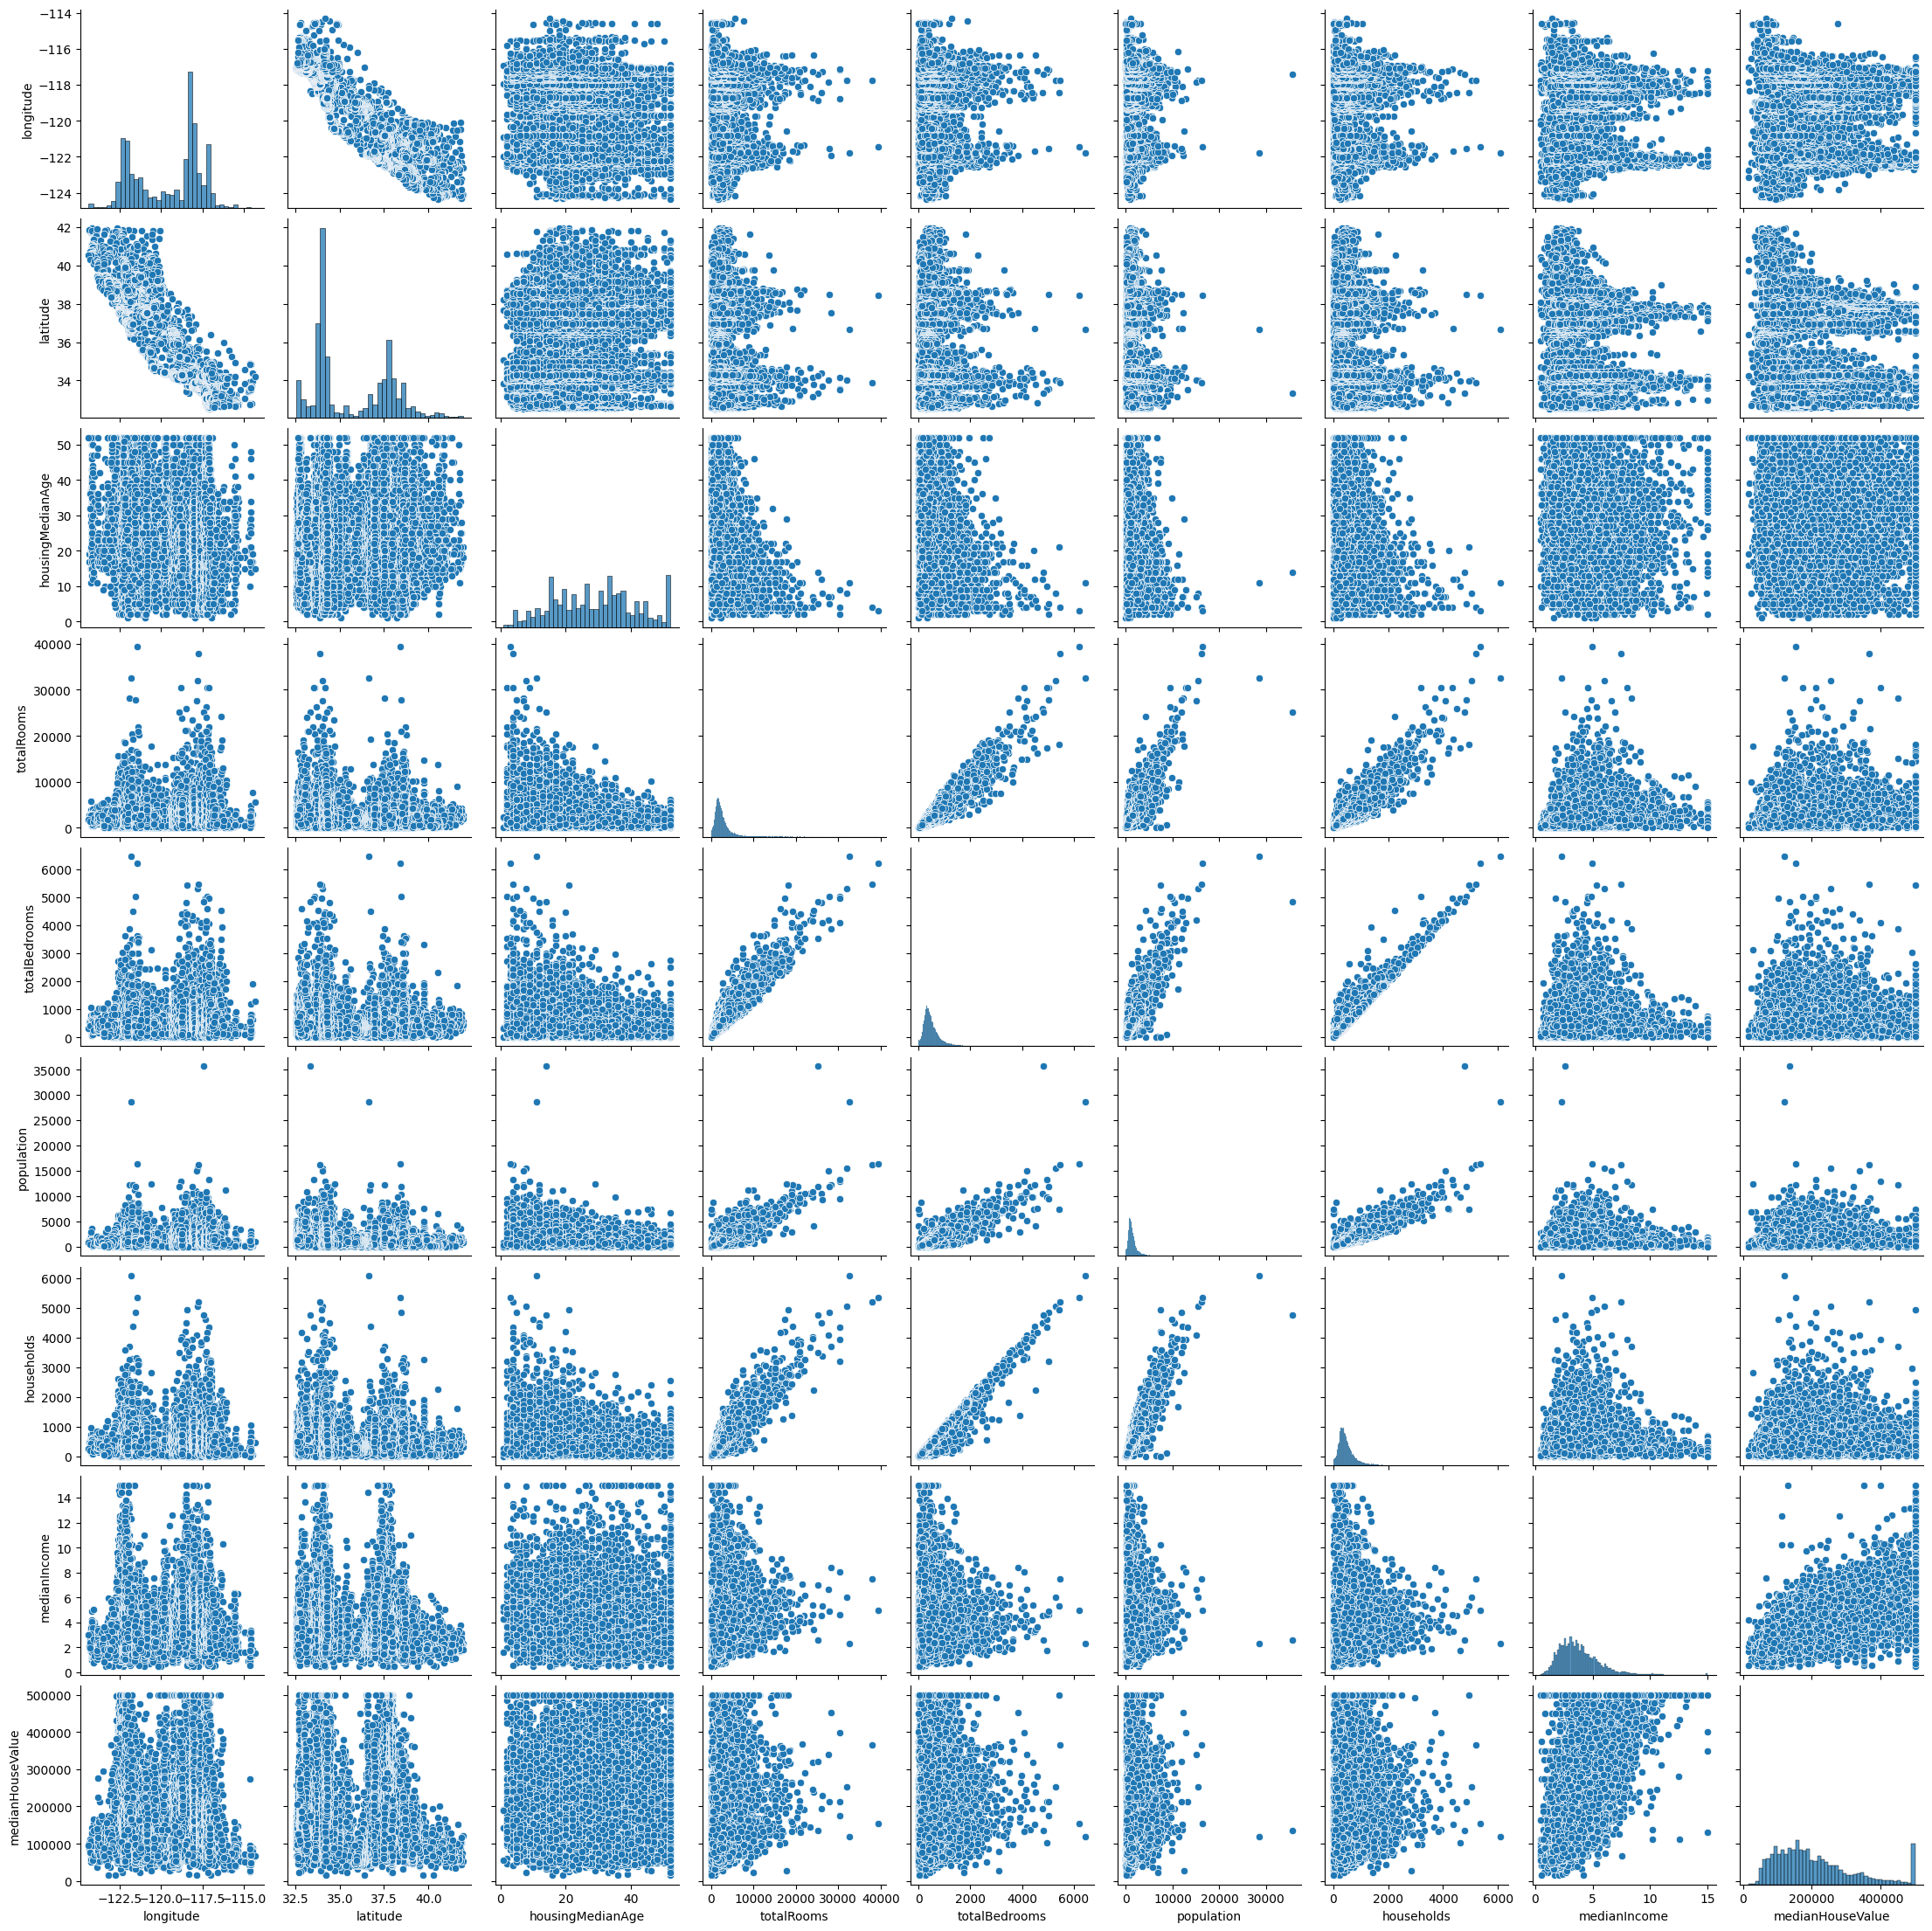

In [24]:
sns.pairplot(df)
plt.show()

<Axes: >

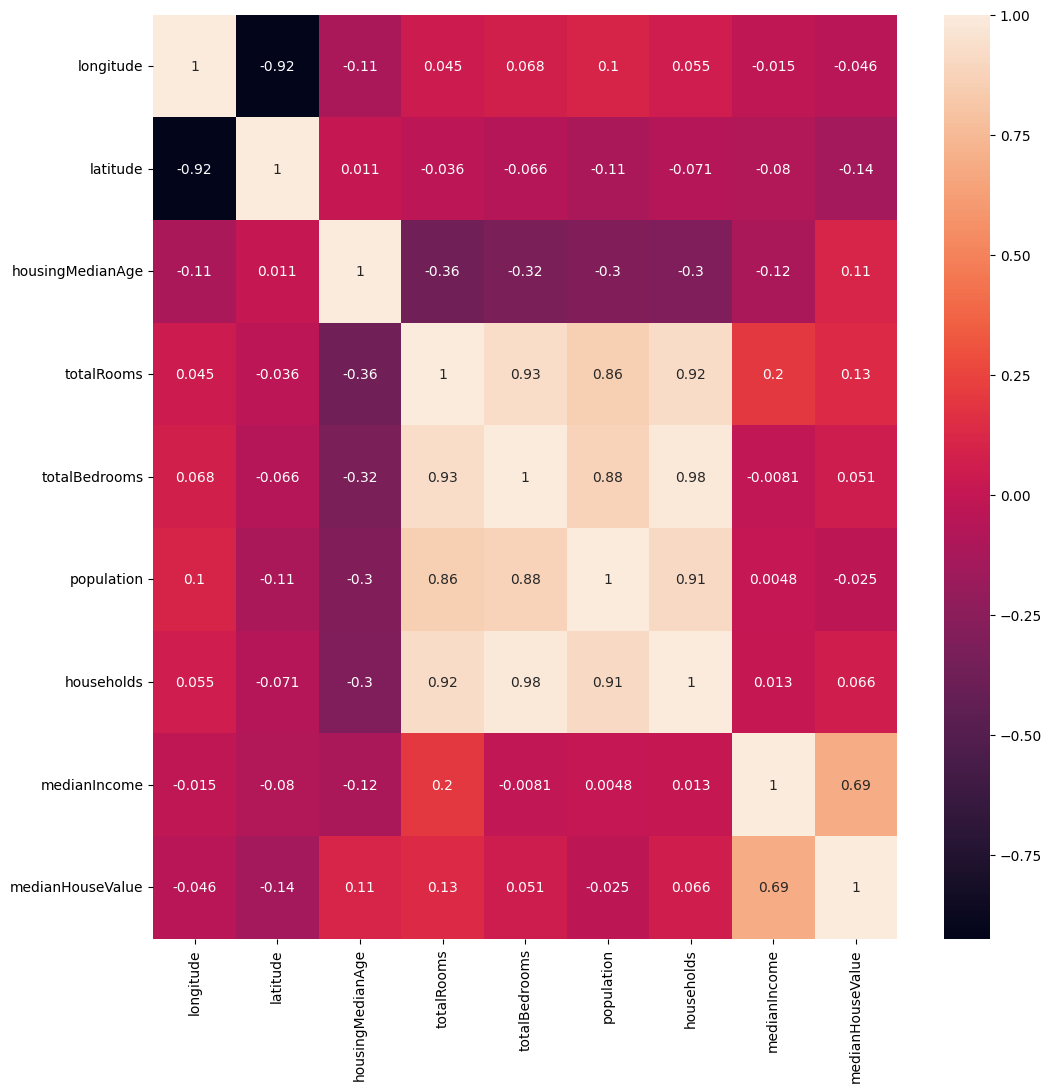

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [29]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [30]:
x.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [31]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: medianHouseValue, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=10)

In [34]:
x_train.shape, x_test.shape

((13828, 8), (6812, 8))

In [35]:
y_train.shape, y_test.shape

((13828,), (6812,))

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_s=scaler.fit_transform(x_train)
x_test_s=scaler.transform(x_test)

In [38]:
x_train_s

array([[-1.43979718,  0.96929441,  1.22081889, ..., -0.95323738,
        -1.05945233, -0.72986836],
       [ 1.08204942, -0.75823526, -0.28439808, ..., -0.100776  ,
        -0.44352654, -0.61046678],
       [-1.2454256 ,  0.94594941, -0.60128586, ...,  0.90779456,
         1.43597233,  0.00784578],
       ...,
       [-1.10587678,  0.78720344, -1.78961504, ...,  0.64381218,
         0.21733804,  0.88684913],
       [ 0.66838683, -0.77224225,  0.50782138, ...,  0.64381218,
        -0.00471246, -0.87672223],
       [-1.15073176,  0.77786545, -0.99739558, ...,  0.21758149,
         0.48168387, -0.62742573]])

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
regressor = LinearRegression()

In [41]:
regressor.fit(x_train_s,y_train)

LinearRegression()

In [42]:
regressor.coef_

array([-87025.4989104 , -92316.37806314,  14947.90496768, -19306.46519473,
        51973.27782476, -37692.73771945,  10388.93765402,  76261.52763375])

In [43]:
regressor.intercept_

np.float64(206347.68086491185)

In [44]:
y_pred = regressor.predict(x_test_s)

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE : " , mean_absolute_error(y_test, y_pred))
print("MSE : " , mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)
adjusted_r2 = 1-((1-r2)*(len(y_test)-1)/(len(y_test)-1*x_test.shape[1]-1))
print("Adjusted R2: ", adjusted_r2)

MAE :  51242.828575121326
MSE :  4939919448.404238
RMSE:  70284.56052650708
R2 Score:  0.6364572781477156
Adjusted R2:  0.6360297694346746


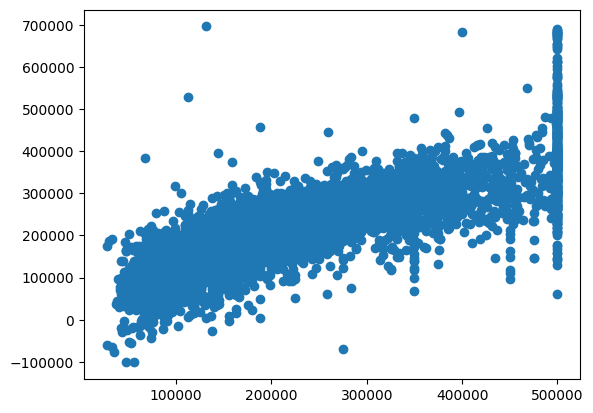

In [48]:
#Assumptions
plt.scatter(y_test, y_pred)

In [54]:
res = y_test - y_pred

C:\Users\1938663\AppData\Local\Temp\ipykernel_14128\2154591961.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: xlabel='medianHouseValue', ylabel='Density'>

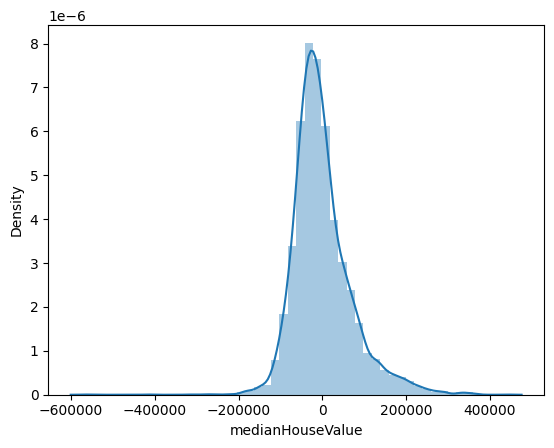

In [55]:
sns.distplot(res)

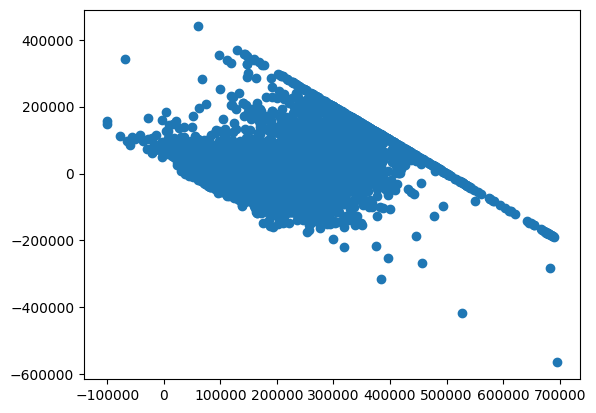

In [57]:
plt.scatter(y_pred, res)
#as it is not uniformly distributed the accuracy might be low or the model might not be that well

In [59]:
import pickle
pickle.dump(regressor, open("MultiLinearRegression.pkl", 'wb'))

In [61]:
model = pickle.load(open('MultiLinearRegression.pkl', 'rb'))

In [64]:
model.predict([x_test_s[0]])

array([278647.78840962])